In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv('Stores.csv')
print(df.head())
print('-'*80)
print(df.tail())
print('-'*80)
print(df.info())

   Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620
--------------------------------------------------------------------------------
     Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
891        892        1582             1910                  1080        66390
892        893        1387             1663                   850        82080
893        894        1200             1436                  1060        76440
894        895        1299             1560                   770        96610
895        896        1174             1429                  1

In [5]:
df.duplicated().value_counts()

False    896
dtype: int64

In [6]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


<AxesSubplot:xlabel='Store_Sales', ylabel='Count'>

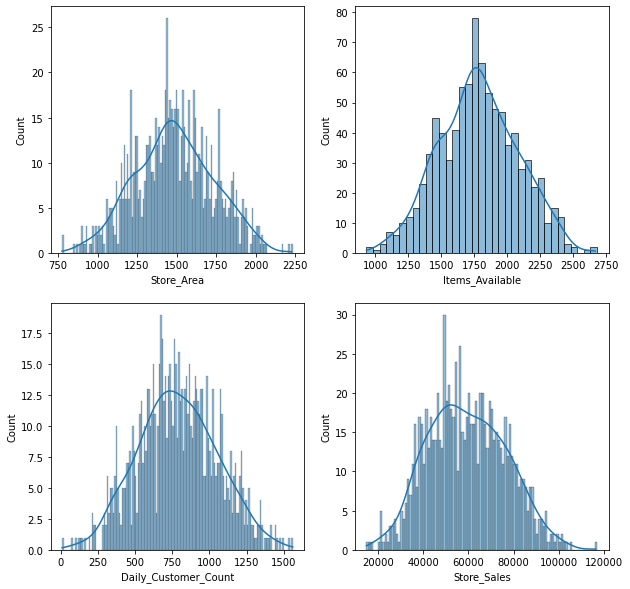

In [7]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
sns.histplot(data=df,x='Store_Area',binwidth=10,kde=True,ax=axes[0,0])
sns.histplot(data = df, x = 'Items_Available',binwidth = 50,kde=True,ax=axes[0,1])
sns.histplot(data = df, x = 'Daily_Customer_Count',binwidth = 10,kde=True,ax=axes[1,0])
sns.histplot(data = df, x = 'Store_Sales',binwidth = 1000,kde=True,ax=axes[1,1])

<AxesSubplot:>

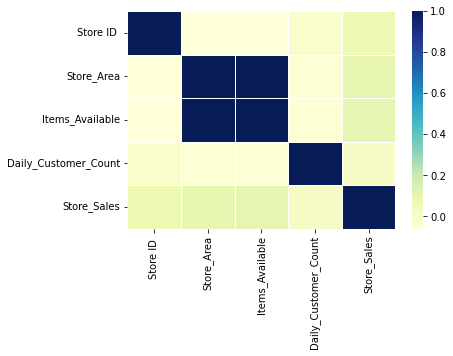

In [8]:
sns.heatmap(df.corr(), cmap='YlGnBu',linewidths= 0.5, linecolor = 'white')

<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

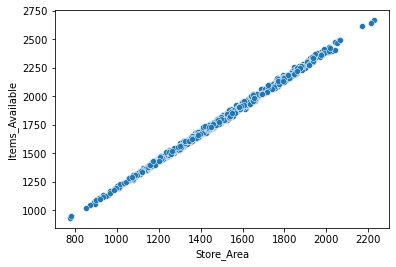

In [9]:
sns.scatterplot(x=df['Store_Area'], y=df['Items_Available'])

In [10]:
high_sales = df.sort_values(by='Store_Sales', ascending=False).head(100)
high_sales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820
...,...,...,...,...,...
50,51,1514,1820,910,81820
752,753,1648,2017,930,81720
331,332,1633,1968,330,81470
621,622,1383,1687,830,81390


In [11]:
high_sales.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,100.000000,100.000000,100.00000,100.000000,100.000000
mean,514.140000,1501.630000,1801.68000,801.100000,88794.800000
std,252.210751,278.123316,332.16799,258.655791,6474.174879
min,30.000000,932.000000,1138.00000,100.000000,81390.000000
25%,342.250000,1290.000000,1547.50000,660.000000,83967.500000
50%,557.500000,1506.000000,1811.00000,815.000000,87195.000000
75%,733.500000,1703.000000,2053.75000,957.500000,92317.500000
max,895.000000,2229.000000,2667.00000,1310.000000,116320.000000


<AxesSubplot:xlabel='Items_Available', ylabel='Store_Sales'>

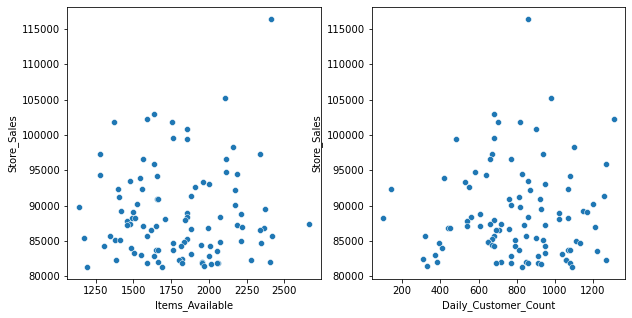

In [12]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x=high_sales['Daily_Customer_Count'],y=high_sales['Store_Sales'])
sns.scatterplot(x=high_sales['Items_Available'],y=high_sales['Store_Sales'], ax=axes[0])

<AxesSubplot:xlabel='Daily_Customer_Count', ylabel='Store_Sales'>

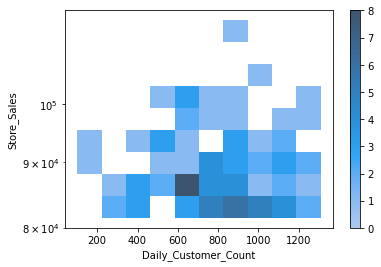

In [13]:
sns.histplot(x=high_sales['Daily_Customer_Count'], y=high_sales['Store_Sales'],cbar=True, log_scale=(False,True))

Dropping the index column

In [14]:
df.drop(df.columns[[0]], axis = 1, inplace = True)

In [15]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [16]:
import missingno as msno

<AxesSubplot:>

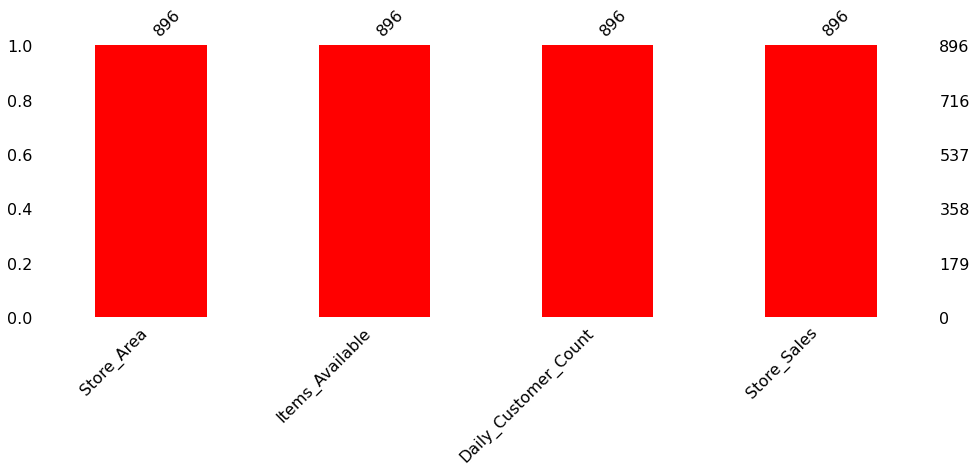

In [17]:
msno.bar(df, figsize= (16,5), color= 'red')

In [18]:
def check_unique_val(train):
    for column_name in train.columns:
        unique_values = len(train[column_name].unique())
        print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                             unique_values=unique_values))

In [19]:
check_unique_val(df)

Feature 'Store_Area' has '583' unique values
Feature 'Items_Available' has '616' unique values
Feature 'Daily_Customer_Count' has '130' unique values
Feature 'Store_Sales' has '816' unique values


In [20]:
for i in df.columns:
    print(i)
    print(1)

Store_Area
1
Items_Available
1
Daily_Customer_Count
1
Store_Sales
1


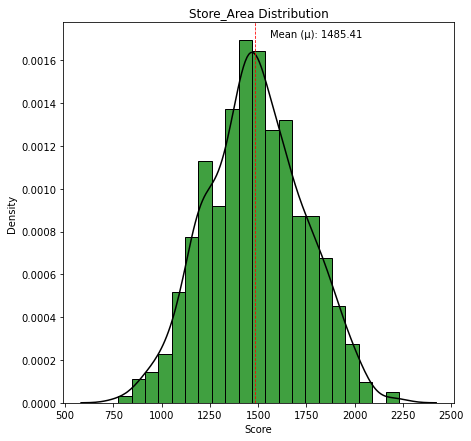

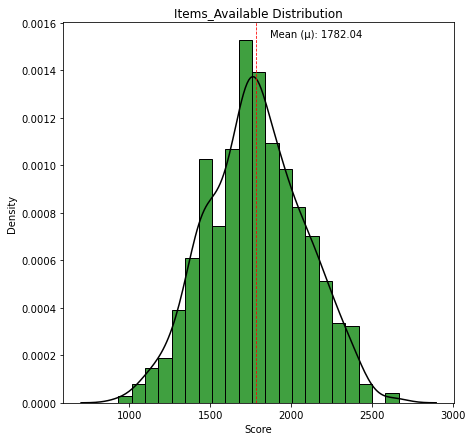

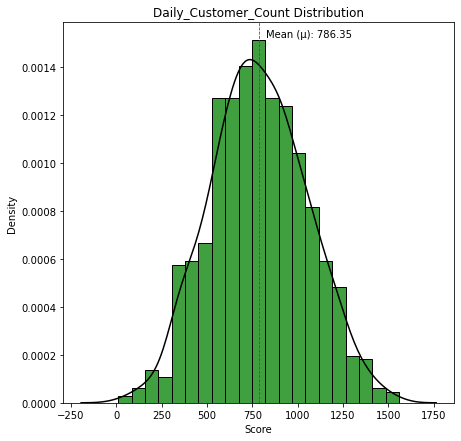

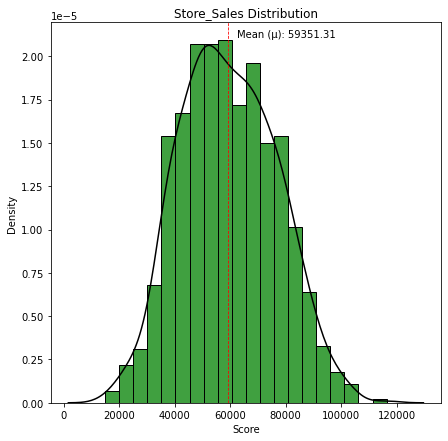

In [21]:
def graph_kde_mean(train):
    for column_name in train.columns:
        plt.figure(figsize=(7,7))
        plt.title(f'{column_name} Distribution')
        sns.histplot(train[column_name], stat='density',color='green')
        sns.kdeplot(train[column_name], color='black')
        plt.axvline(train[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
        min_ylim, max_ylim = plt.ylim()
        plt.text(train[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(train[column_name].mean()))
        plt.xlabel("Score")
        plt.ylabel("Density")
        plt.show()
        
graph_kde_mean(df)

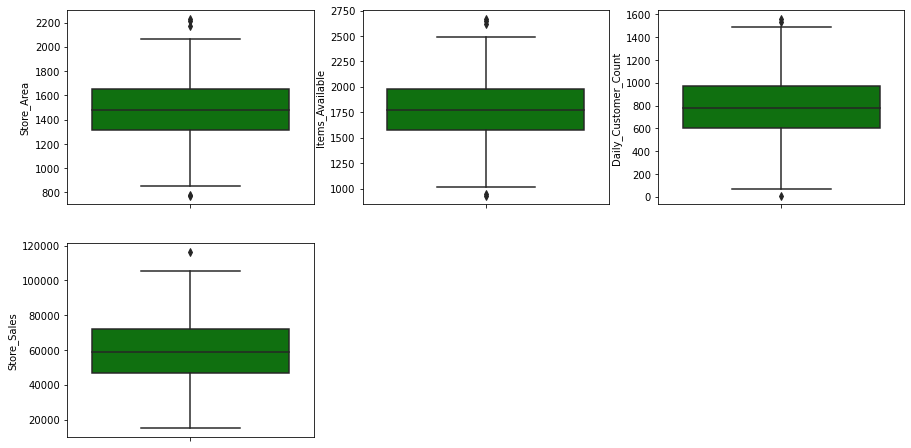

In [22]:
def outlier_detection_by_columns(train):
    i=1
    plt.figure(figsize=(15,25))
    for feature in train.columns:
        plt.subplot(6,3,i)
        sns.boxplot(y=train[feature],color='green')
        i+=1
outlier_detection_by_columns(df)

In [23]:
correlation = df.corr()
print(correlation['Store_Sales'].sort_values(ascending = False),'\n')

Store_Sales             1.000000
Items_Available         0.098849
Store_Area              0.097474
Daily_Customer_Count    0.008629
Name: Store_Sales, dtype: float64 



Index(['Store_Sales', 'Items_Available', 'Store_Area', 'Daily_Customer_Count'], dtype='object')


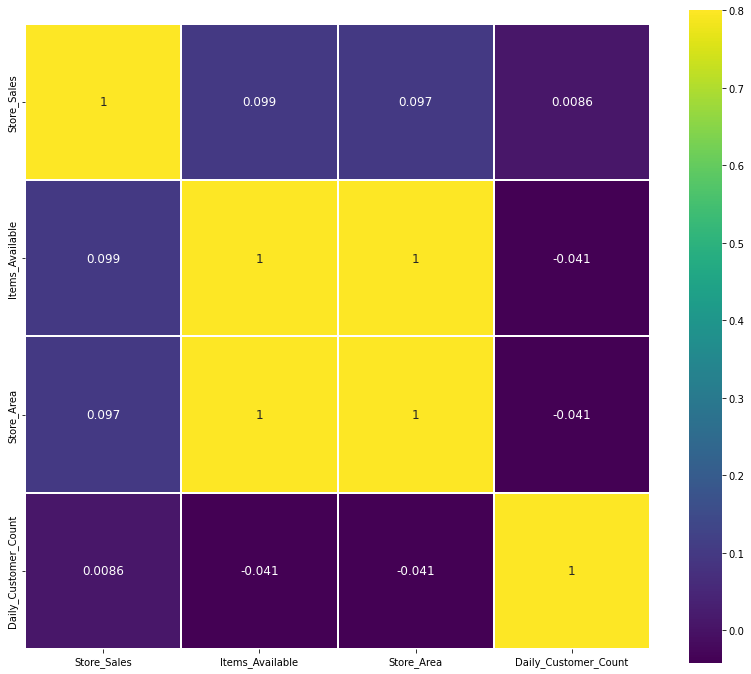

In [24]:
k= 10
cols = correlation.nlargest(k,'Store_Sales')['Store_Sales'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)
plt.show()

In [25]:
train=df.drop('Store_Area',axis=1)

In [26]:
train

,Items_Available,Daily_Customer_Count,Store_Sales
0,1961,530,66490
1,1752,210,39820
2,1609,720,54010
3,1748,620,53730
4,2111,450,46620
...,...,...,...
891,1910,1080,66390
892,1663,850,82080
893,1436,1060,76440
894,1560,770,96610


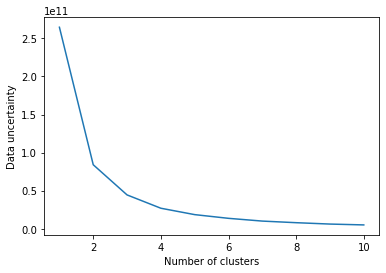

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(train)
    wcss.append(km.inertia_)
fig, ax = plt.subplots()

ax.plot(range(1,11),wcss)

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Data uncertainty')

plt.show()

https://www.kaggle.com/code/georgyzubkov/store-sales-exploratory-data-analysis/notebook

In [28]:
from sklearn.neighbors import LocalOutlierFactor

In [29]:
clf = LocalOutlierFactor(n_neighbors=5, contamination='auto')
y_pred = clf.fit_predict(train)

In [30]:
train['Out'] = y_pred
Out = train[train['Out'] !=1]
Out.shape

(20, 4)

In [31]:
train2=train[train['Out']==1]
train2

,Items_Available,Daily_Customer_Count,Store_Sales,Out
0,1961,530,66490,1
1,1752,210,39820,1
2,1609,720,54010,1
3,1748,620,53730,1
4,2111,450,46620,1
...,...,...,...,...
891,1910,1080,66390,1
892,1663,850,82080,1
893,1436,1060,76440,1
894,1560,770,96610,1


In [32]:
Out

,Items_Available,Daily_Customer_Count,Store_Sales,Out
31,1508,990,14920,-1
83,1884,1410,42670,-1
112,2248,1330,56010,-1
158,932,1090,42530,-1
226,2227,1220,68230,-1
231,1661,1410,49160,-1
291,1093,1210,64640,-1
334,1973,1440,44660,-1
406,1059,870,75110,-1
446,1428,1290,74570,-1


In [36]:
y = train2['Store_Sales']
X= train2.drop(['Store_Sales','Out'], axis=1)


In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [43]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [44]:
models = [RandomForestRegressor(), LinearRegression(), ElasticNet(), KNeighborsRegressor()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    
    print(f'model: {str(m)}')
    print(f'RMSE: {mean_squared_error(y_test, y_pred)}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    print('-'*30,'\n')

model: RandomForestRegressor()
RMSE: 311508475.1038536
MAE: 14746.299517045454
------------------------------ 

model: LinearRegression()
RMSE: 254003891.854681
MAE: 13228.167904160182
------------------------------ 

model: ElasticNet()
RMSE: 254003889.17001355
MAE: 13228.168461403227
------------------------------ 

model: KNeighborsRegressor()
RMSE: 298616812.84090906
MAE: 14487.511363636364
------------------------------ 

